# Fréchet Mean and Tangent PCA

Lead author: Nina Miolane.

This notebook shows how to compute the Fréchet mean of a data set.
Then it performs tangent PCA at the mean.

In [1]:
import matplotlib.pyplot as plt

import geomstats.backend as gs
import geomstats.visualization as visualization

from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

INFO: Using numpy backend


## On the sphere

### Generate data on the sphere

In [2]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

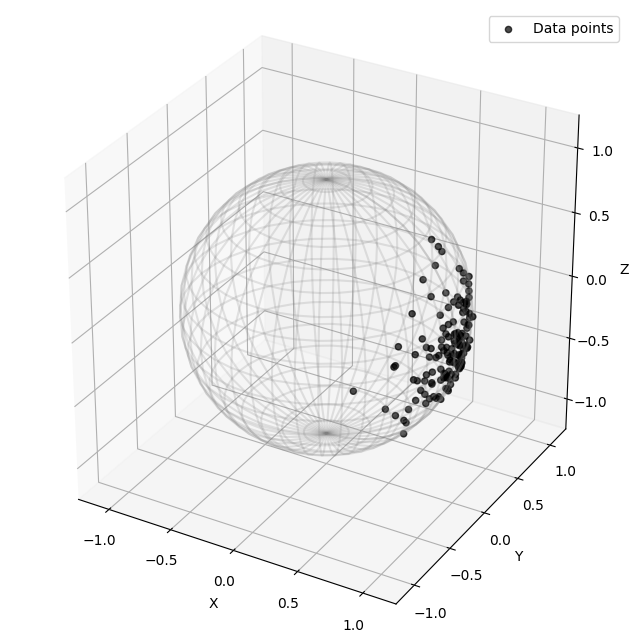

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space="S2", color="black", alpha=0.7, label="Data points")
ax.set_box_aspect([1, 1, 1])
ax.legend();

### Fréchet mean

We compute the Fréchet mean of the simulated data points.

In [4]:
mean = FrechetMean(sphere)
mean.fit(data)

mean_estimate = mean.estimate_

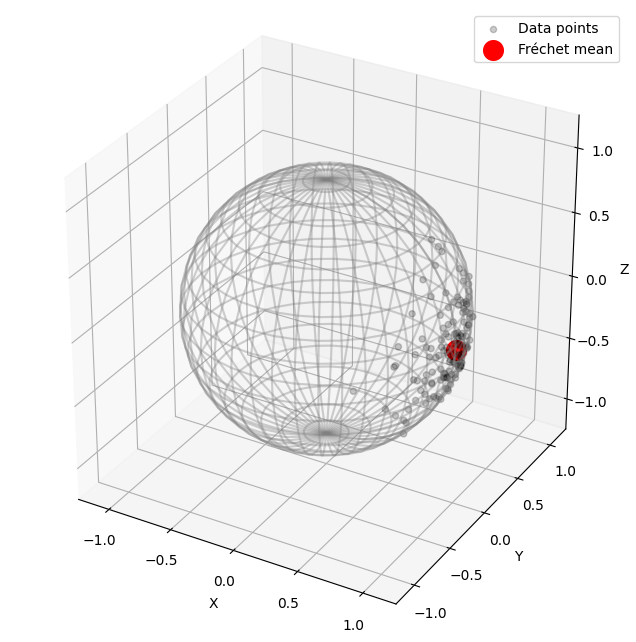

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space="S2", color="black", alpha=0.2, label="Data points")
ax = visualization.plot(
    mean_estimate, space="S2", color="red", ax=ax, s=200, label="Fréchet mean"
)
ax.set_box_aspect([1, 1, 1])
ax.legend();

### Tangent PCA (at the Fréchet mean)

We perform tangent PCA at the Fréchet mean, with two principal components.

In [6]:
tpca = TangentPCA(sphere, n_components=2)
tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

We compute the geodesics on the sphere corresponding to the two principal components.

In [7]:
geodesic_0 = sphere.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[0]
)
geodesic_1 = sphere.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[1]
)

n_steps = 100
t = gs.linspace(-1.0, 1.0, n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

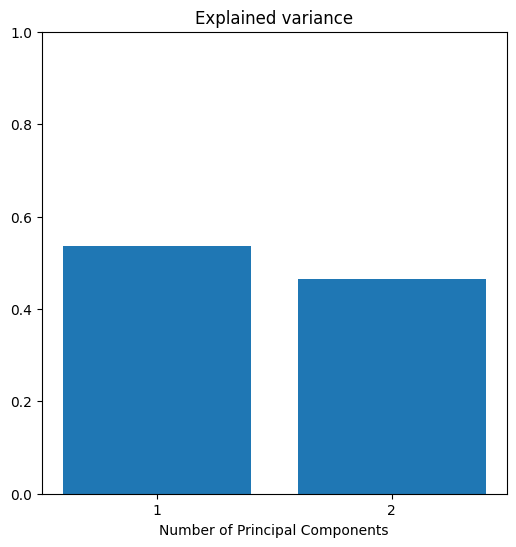

In [8]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
xticks = gs.arange(1, 2 + 1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title("Explained variance")
ax.set_xlabel("Number of Principal Components")
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_);

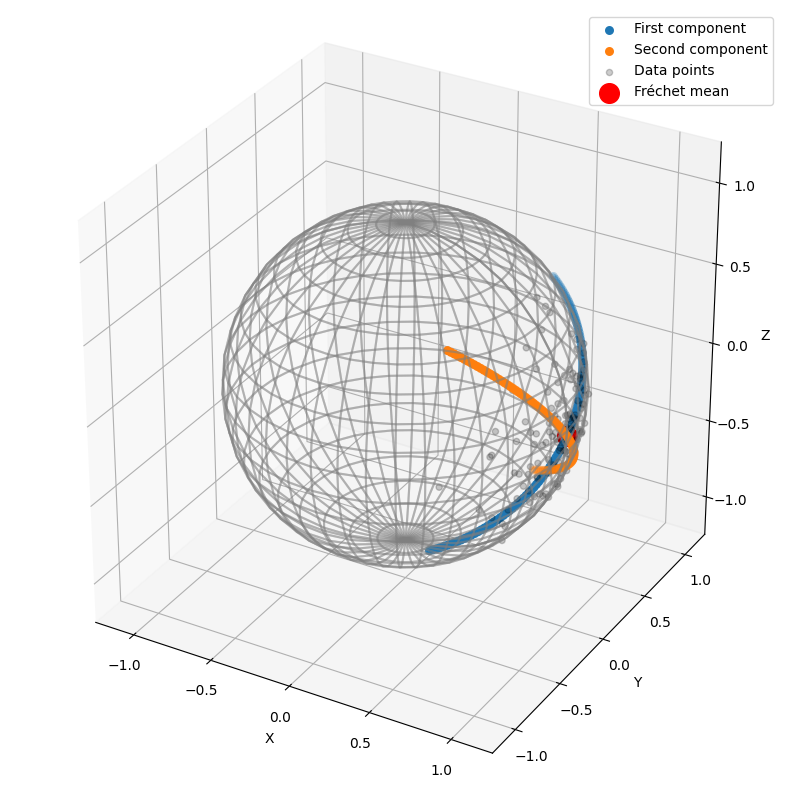

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax = visualization.plot(
    geodesic_points_0, ax, space="S2", linewidth=2, label="First component"
)
ax = visualization.plot(
    geodesic_points_1, ax, space="S2", linewidth=2, label="Second component"
)
ax = visualization.plot(
    data, ax, space="S2", color="black", alpha=0.2, label="Data points"
)
ax = visualization.plot(
    mean_estimate, ax, space="S2", color="red", s=200, label="Fréchet mean"
)
ax.legend()
ax.set_box_aspect([1, 1, 1]);

## In the Hyperbolic plane

### Generate data on the hyperbolic plane

In [10]:
from geomstats.geometry.hyperboloid import Hyperboloid

hyperbolic_plane = Hyperboloid(dim=2)

data = hyperbolic_plane.random_point(n_samples=140)

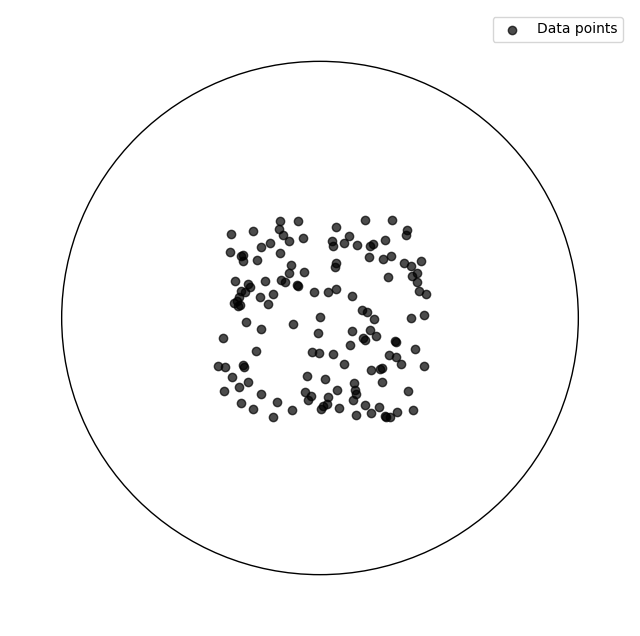

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(
    data, space="H2_poincare_disk", color="black", alpha=0.7, label="Data points"
)
ax.legend();

### Fréchet mean

We compute the Fréchet mean of the data points.

In [12]:
mean = FrechetMean(hyperbolic_plane)
mean.fit(data)

mean_estimate = mean.estimate_

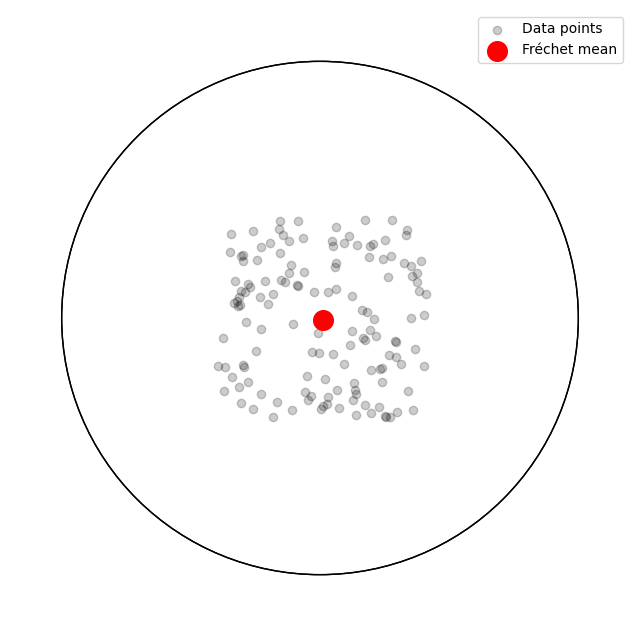

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(
    data, space="H2_poincare_disk", color="black", alpha=0.2, label="Data points"
)
ax = visualization.plot(
    mean_estimate,
    space="H2_poincare_disk",
    color="red",
    ax=ax,
    s=200,
    label="Fréchet mean",
)
ax.legend();

### Tangent PCA (at the Fréchet mean)

We perform tangent PCA at the Fréchet mean.

In [14]:
tpca = TangentPCA(hyperbolic_plane, n_components=2)
tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

We compute the geodesics corresponding to the first components of the tangent PCA.

In [15]:
geodesic_0 = hyperbolic_plane.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[0]
)
geodesic_1 = hyperbolic_plane.metric.geodesic(
    initial_point=mean_estimate, initial_tangent_vec=tpca.components_[1]
)

n_steps = 100
t = gs.linspace(-1.0, 1.0, n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

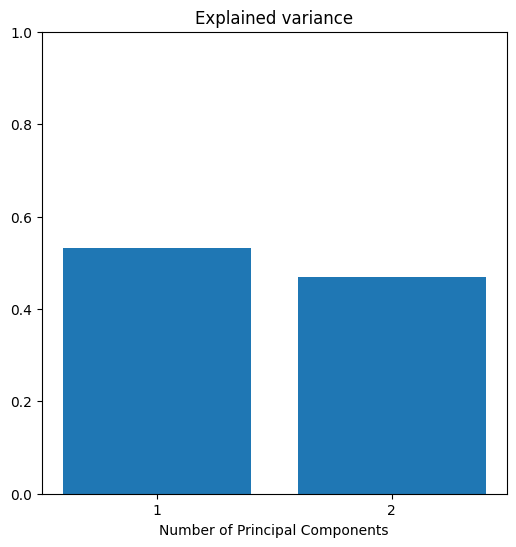

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
xticks = gs.arange(1, 2 + 1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title("Explained variance")
ax.set_xlabel("Number of Principal Components")
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_);

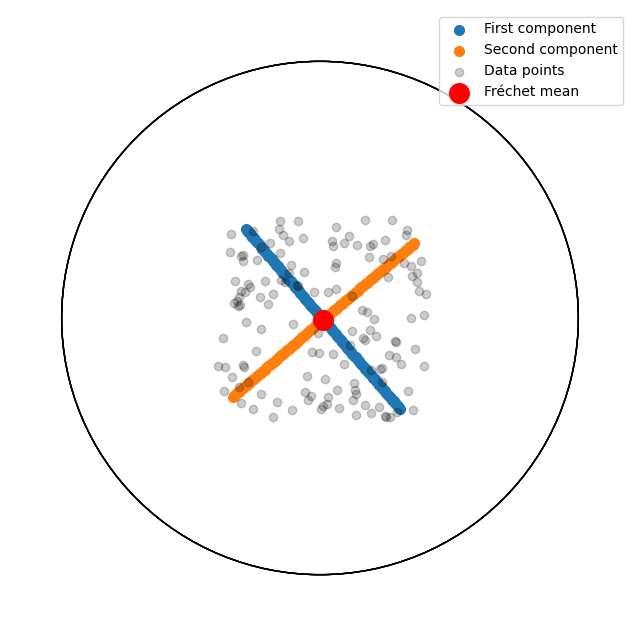

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax = visualization.plot(
    geodesic_points_0,
    ax,
    space="H2_poincare_disk",
    linewidth=2,
    label="First component",
)
ax = visualization.plot(
    geodesic_points_1,
    ax,
    space="H2_poincare_disk",
    linewidth=2,
    label="Second component",
)
ax = visualization.plot(
    data, ax, space="H2_poincare_disk", color="black", alpha=0.2, label="Data points"
)
ax = visualization.plot(
    mean_estimate,
    ax,
    space="H2_poincare_disk",
    color="red",
    s=200,
    label="Fréchet mean",
)
ax.legend();